In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats

In [2]:
df = pd.read_csv('Normalized Project Data - Solar Flare Values.csv')

In [3]:
df.head()

,Year,Month,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,Longitude,Latitude,OutagesCount,None,D0,D1,D2,D3,D4,Solar Flare Value
0,2000,1,1.076999,0.774832,1.211398,-0.845796,0.328951,-116.3550,34.6920,-0.806708,47.7125,0.751639,-0.568918,-0.840025,-1.230324,-0.702368,-0.059479
1,2000,2,1.457999,0.711796,1.969653,-1.203303,0.542631,151.9070,-4.3580,0.000000,49.2420,0.604130,-0.111601,-0.697686,-1.230324,-0.702368,0.779187
2,2000,3,2.551549,1.649988,3.051555,-1.018921,0.678981,-117.5950,36.0800,-0.806708,58.9700,-0.334065,-0.185846,-0.372100,-1.230324,-0.702368,1.912673
3,2000,4,1.986791,1.684658,1.985065,-0.891600,0.334007,-118.8233,38.0899,-0.806708,61.3375,-0.562394,-0.503059,-0.455473,-1.171693,-0.702368,1.288001
4,2000,5,1.648499,1.671000,1.379899,-0.701008,0.375457,-115.9840,31.7200,-0.249227,63.6940,-0.789661,-0.533667,-0.459050,-0.756361,-0.680122,1.427728


In [4]:
df.columns

Index(['Year', 'Month', 'Total Daily Sunspots',
       'Northern Total Daily Sunspots', 'Southern Total Daily Sunspots',
       'Earthquake', 'Magnitude', 'Longitude', 'Latitude', 'OutagesCount',
       'None', 'D0', 'D1', 'D2', 'D3', 'D4', 'Solar Flare Value'],
      dtype='object')

In [5]:
df.isna().sum()

Year                             0
Month                            0
Total Daily Sunspots             0
Northern Total Daily Sunspots    0
Southern Total Daily Sunspots    0
Earthquake                       1
Magnitude                        1
Longitude                        1
Latitude                         1
OutagesCount                     0
None                             0
D0                               0
D1                               0
D2                               0
D3                               0
D4                               0
Solar Flare Value                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           169 non-null    int64  
 1   Month                          169 non-null    int64  
 2   Total Daily Sunspots           169 non-null    float64
 3   Northern Total Daily Sunspots  169 non-null    float64
 4   Southern Total Daily Sunspots  169 non-null    float64
 5   Earthquake                     168 non-null    float64
 6   Magnitude                      168 non-null    float64
 7   Longitude                      168 non-null    float64
 8   Latitude                       168 non-null    float64
 9   OutagesCount                   169 non-null    float64
 10  None                           169 non-null    float64
 11  D0                             169 non-null    float64
 12  D1                             169 non-null    flo

In [8]:
df2 = df.dropna()

In [9]:
df2.isna().sum()

Year                             0
Month                            0
Total Daily Sunspots             0
Northern Total Daily Sunspots    0
Southern Total Daily Sunspots    0
Earthquake                       0
Magnitude                        0
Longitude                        0
Latitude                         0
OutagesCount                     0
None                             0
D0                               0
D1                               0
D2                               0
D3                               0
D4                               0
Solar Flare Value                0
dtype: int64

In [10]:
df2.describe()

,Year,Month,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,Longitude,Latitude,OutagesCount,None,D0,D1,D2,D3,D4,Solar Flare Value
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2006.523810,6.482143,0.051030,0.031584,0.062413,0.012543,-0.092498,-91.027490,35.140302,0.004802,55.435616,0.006801,0.010540,0.009401,0.007278,0.004151,0.004266
std,4.075562,3.483018,1.058284,1.065521,1.041464,0.760728,0.980180,84.171538,22.773699,0.955117,10.390145,1.002055,0.996539,0.998474,1.001484,1.004513,1.004431
min,2000.000000,1.000000,-1.241596,-1.104703,-1.189744,-1.203303,-2.351292,-179.970000,-36.426000,-1.029701,28.434000,-2.113194,-1.890124,-1.652115,-1.230324,-0.702368,-0.719083
25%,2003.000000,3.000000,-0.880264,-0.897733,-0.829624,-0.375525,-0.932328,-122.826458,33.652625,-0.695212,49.341750,-0.740752,-0.627978,-0.824144,-0.889770,-0.650862,-0.670988
50%,2006.500000,6.500000,-0.119106,-0.255287,-0.138153,0.006824,0.048895,-118.445250,37.929400,-0.249227,55.725250,-0.021133,-0.116908,-0.057506,-0.226746,-0.352885,-0.365259
75%,2010.000000,9.250000,0.786753,0.713372,0.745194,0.283591,0.639858,-99.966250,46.530917,0.308254,63.186875,0.594510,0.710250,0.622904,0.686521,0.172478,0.272192
max,2014.000000,12.000000,3.014593,3.237454,3.051555,4.134842,2.058399,176.152800,65.245900,4.545112,77.417500,2.610912,2.561277,2.493725,2.486106,4.120880,6.543215


In [11]:
def find_outliers_IQR(df2):

   q1=df2.quantile(0.25)

   q3=df2.quantile(0.75)

   IQR=q3-q1

   outliers = df2[((df2<(q1-1.5*IQR)) | (df2>(q3+1.5*IQR)))]

   return outliers

In [13]:
outliers = find_outliers_IQR(df2['None'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 1
max outlier value: 28.434
min outlier value: 28.434


<Axes: >

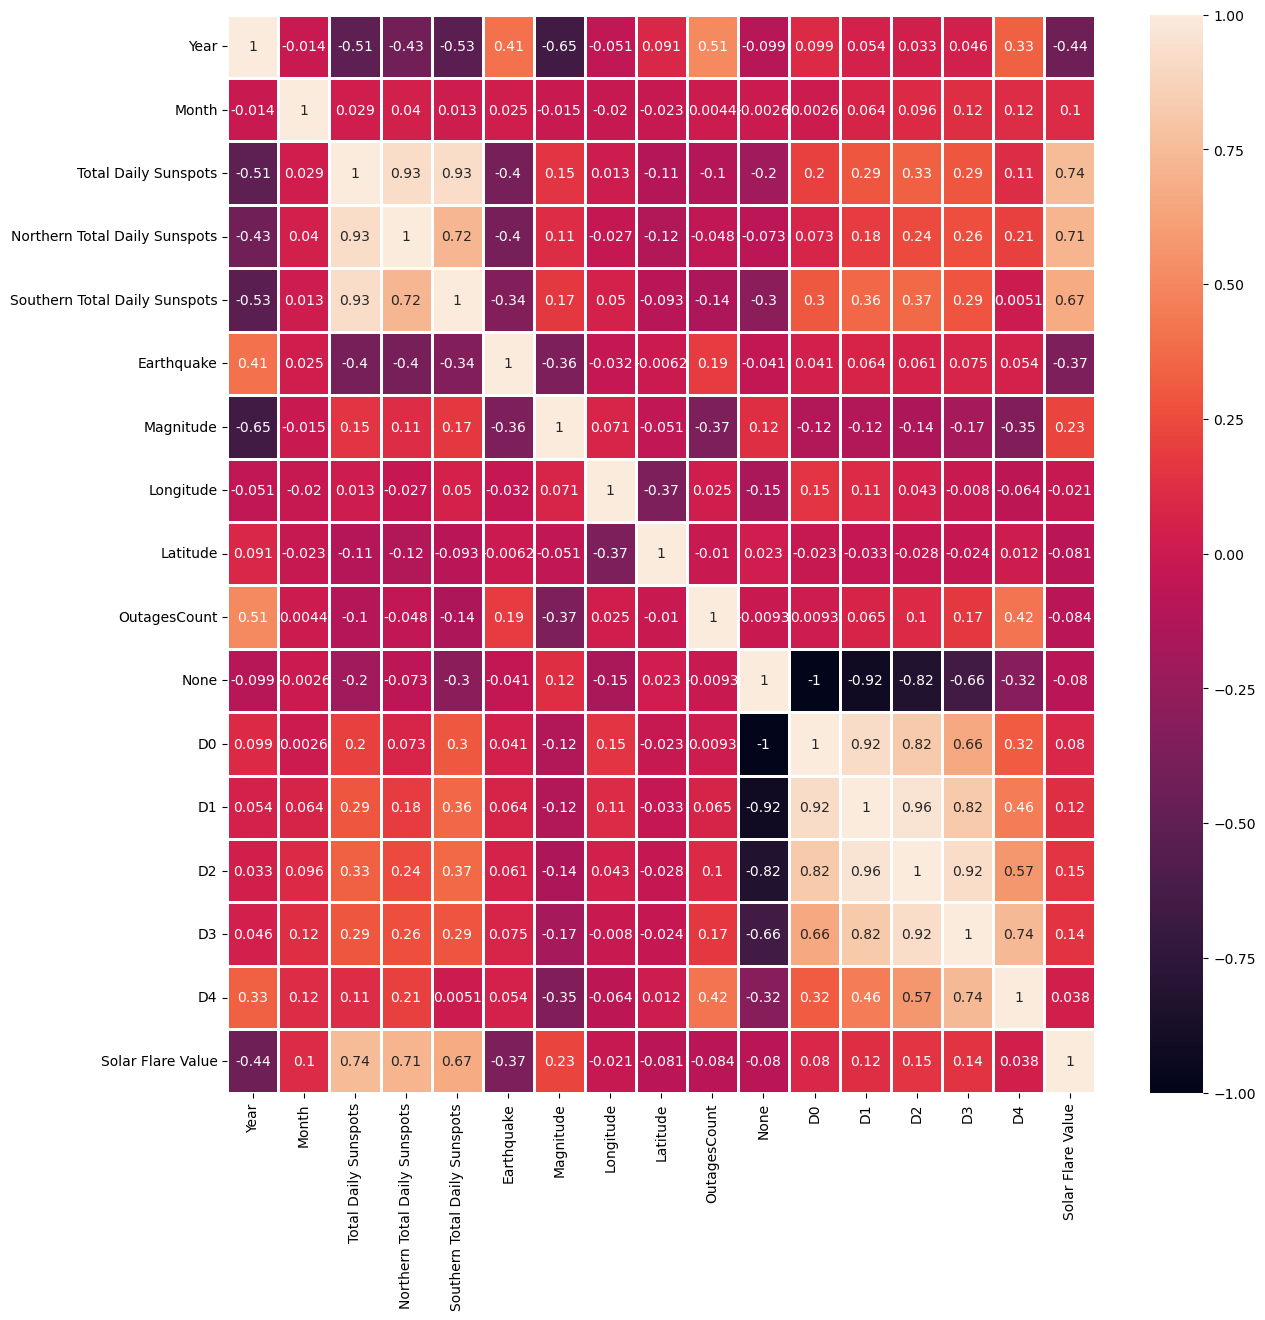

In [15]:
plt.subplots(figsize=(14,14))
sns.heatmap(df2.corr(), annot=True,linecolor='white',linewidths=1)

In [15]:
%matplotlib inline
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [16]:
df2.columns

Index(['Year', 'Month', 'Total Daily Sunspots',
       'Northern Total Daily Sunspots', 'Southern Total Daily Sunspots',
       'Earthquake', 'Magnitude', 'Longitude', 'Latitude', 'OutagesCount',
       'None', 'D0', 'D1', 'D2', 'D3', 'D4', 'Solar Flare Value'],
      dtype='object')

In [17]:
predictors = ['Year', 'Month','Total Daily Sunspots', 'Magnitude', 'OutagesCount',
       'None', 'D0', 'D1', 'D2', 'D3', 'D4', 'Solar Flare Value']

outcome = 'Earthquake'

# Create dummies for Fuel_Type
# X = pd.get_dummies(X, columns=['CAUSE.CATEGORY.DETAIL','CAUSE.CATEGORY', 'CLIMATE.REGION'], drop_first=True)

X = df2[predictors]
y = df2[outcome]
print(X.shape)
X.head(1)

(168, 12)


,Year,Month,Total Daily Sunspots,Magnitude,OutagesCount,None,D0,D1,D2,D3,D4,Solar Flare Value
0,2000,1,1.076999,0.328951,-0.806708,47.7125,0.751639,-0.568918,-0.840025,-1.230324,-0.702368,-0.059479


In [18]:
X.isna().sum()

Year                    0
Month                   0
Total Daily Sunspots    0
Magnitude               0
OutagesCount            0
None                    0
D0                      0
D1                      0
D2                      0
D3                      0
D4                      0
Solar Flare Value       0
dtype: int64

In [19]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [20]:
lm = LinearRegression()
lm.fit(train_X, train_y)

LinearRegression()

In [21]:
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

# print performance measures
regressionSummary(train_y, lm.predict(train_X))

intercept  -1013629412.7702591
               Predictor   coefficient
0                   Year  4.685489e-02
1                  Month -7.246059e-03
2   Total Daily Sunspots -2.250654e-01
3              Magnitude -1.471515e-01
4           OutagesCount -4.934542e-03
5                   None  1.826157e+07
6                     D0  1.893514e+08
7                     D1  7.004770e-01
8                     D2 -3.029682e-01
9                     D3  3.922684e-01
10                    D4 -3.070654e-01
11     Solar Flare Value  9.414494e-03

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.5948
            Mean Absolute Error (MAE) : 0.3887
          Mean Percentage Error (MPE) : 148.9661
Mean Absolute Percentage Error (MAPE) : 268.7444


In [22]:
pred_y = lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, lm))

adjusted r2 :  0.29288680670554434


In [23]:
# Use predict() to make predictions on a new set
lm_pred = lm.predict(valid_X)

result = pd.DataFrame({'Predicted': lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - lm_pred})
#Print the first 20 predictions
print(result.head(20))

     Predicted    Actual  Residual
40    0.208850 -0.311283 -0.520133
133   0.369436 -0.232096 -0.601532
4    -0.596078 -0.701008 -0.104930
149   0.276300  0.002748 -0.273551
116   0.441721 -0.347771 -0.789492
11   -0.571926 -0.777866 -0.205939
78    0.380135  0.252731 -0.127404
19   -0.422130 -0.829493 -0.407363
84   -0.050382 -0.336514 -0.286132
14   -0.445613 -1.006111 -0.560498
166  -0.047696  0.538426  0.586122
105   0.048059  0.101732  0.053673
95   -0.316090 -0.134276  0.181813
122  -0.016789  0.011676  0.028466
31   -0.807071 -0.886166 -0.079095
163   0.753777  0.455357 -0.298420
88    0.248381 -0.269748 -0.518129
162   0.517498  0.165393 -0.352106
107   0.001198  0.591218  0.590020
136   0.715906  0.540755 -0.175151


C:\Users\Richwei Chea\AppData\Local\Temp\ipykernel_291008\2514282727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((valid_y-lm_pred),bins=50);


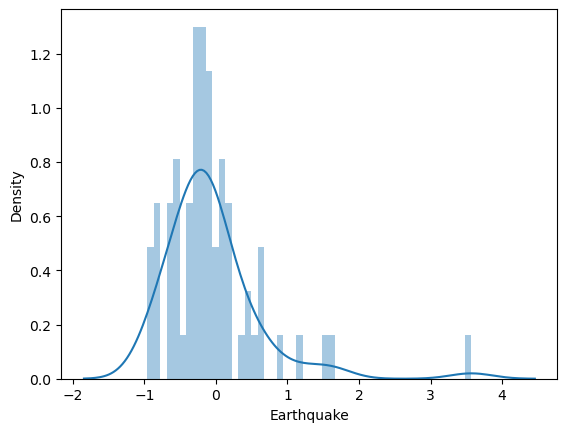

In [25]:
sns.distplot((valid_y-lm_pred),bins=50);

In [28]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)

    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj         AIC     D0     D1     D2     D3     D4  Magnitude  Month   None  \
0    1  0.198892  210.268271  False  False  False  False  False      False  False  False   
1    2  0.225148  207.910341  False  False  False  False  False      False  False  False   
2    3  0.258348  204.494871  False  False  False   True   True      False  False  False   
3    4  0.294110  200.505605  False  False  False   True   True      False  False  False   
4    5  0.308615  199.371076  False   True  False  False   True       True  False   True   
5    6  0.315864  199.247621  False   True  False   True   True      False  False   True   
6    7  0.324932  198.832246  False   True  False   True   True       True  False   True   
7    8  0.321157  200.296947  False   True   True   True   True       True  False   True   
8    9  0.315333  202.046217   True   True   True   True   True       True  False   True   
9   10  0.308684  203.895279   True   True   True   True   True       True   Tru

In [29]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Year, Month, Total Daily Sunspots, Magnitude, OutagesCount, None, D0, D1, D2, D3, D4, Solar Flare Value
Start: score=207.88
Step: score=205.89, remove OutagesCount
Step: score=203.90, remove Solar Flare Value
Step: score=202.05, remove Month
Step: score=200.30, remove D0
Step: score=198.83, remove D2
Step: score=198.83, remove None
['Year', 'Total Daily Sunspots', 'Magnitude', 'None', 'D1', 'D3', 'D4']


In [30]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Year, Month, Total Daily Sunspots, Magnitude, OutagesCount, None, D0, D1, D2, D3, D4, Solar Flare Value
Start: score=231.46, constant
Step: score=210.27, add Year
Step: score=207.91, add Solar Flare Value
Step: score=207.88, add D3
Step: score=202.83, add D4
Step: score=201.48, add None
Step: score=201.48, add None
['Year', 'Solar Flare Value', 'D3', 'D4', 'None']


In [31]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Year, Month, Total Daily Sunspots, Magnitude, OutagesCount, None, D0, D1, D2, D3, D4, Solar Flare Value
Start: score=231.46, constant
Step: score=210.27, add Year
Step: score=207.91, add Solar Flare Value
Step: score=207.88, add D3
Step: score=202.83, add D4
Step: score=201.48, add None
Step: score=201.48, unchanged None
['Year', 'Solar Flare Value', 'D3', 'D4', 'None']


In [32]:
coeff_df = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Year,4.685489e-02
Month,-7.246059e-03
Total Daily Sunspots,-2.250654e-01
Magnitude,-1.471515e-01
OutagesCount,-4.934542e-03
None,1.826157e+07
D0,1.893514e+08
D1,7.004770e-01
D2,-3.029682e-01
D3,3.922684e-01


In [33]:
import statsmodels.api as sm
# Add a constant to the independent values to represent the intercept
X_train_with_constant = sm.add_constant(train_X)
# Fit the model
model = sm.OLS(train_y, X_train_with_constant).fit()
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Earthquake   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     4.417
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           1.75e-05
Time:                        17:18:37   Log-Likelihood:                -89.941
No. Observations:                 100   AIC:                             205.9
Df Residuals:                      87   BIC:                             239.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.014e+09 

In [36]:
coef_df = pd.DataFrame({'Predictor': train_X.columns, 'coefficient': model.coef_})
# Create the chart
coef_df.plot(kind = 'bar', x = 'Predictor', y = 'coefficient',color=['lightblue', 'skyblue'])

AttributeError: 'OLSResults' object has no attribute 'coef_'

# Visuals


In [97]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

5.9.0


In [98]:
import cufflinks as cf

In [99]:
import chart_studio.plotly as py

In [100]:
init_notebook_mode(connected=True)

In [107]:
import plotly.graph_objs as go
import plotly.express as px

In [102]:
cf.go_offline()

In [103]:
df_drought = df2[['D0', 'D1', 'D2', 'D3', 'D4']]   

In [104]:

df_drought.head()

,D0,D1,D2,D3,D4
0,0.751639,-0.568918,-0.840025,-1.230324,-0.702368
1,0.604130,-0.111601,-0.697686,-1.230324,-0.702368
2,-0.334065,-0.185846,-0.372100,-1.230324,-0.702368
3,-0.562394,-0.503059,-0.455473,-1.171693,-0.702368
4,-0.789661,-0.533667,-0.459050,-0.756361,-0.680122


In [92]:
df2.head()

,Year,Month,Total Daily Sunspots,Northern Total Daily Sunspots,Southern Total Daily Sunspots,Earthquake,Magnitude,Longitude,Latitude,OutagesCount,None,D0,D1,D2,D3,D4,Solar Flare Value
0,2000,1,1.076999,0.774832,1.211398,-0.845796,0.328951,-116.3550,34.6920,-0.806708,47.7125,0.751639,-0.568918,-0.840025,-1.230324,-0.702368,-0.059479
1,2000,2,1.457999,0.711796,1.969653,-1.203303,0.542631,151.9070,-4.3580,0.000000,49.2420,0.604130,-0.111601,-0.697686,-1.230324,-0.702368,0.779187
2,2000,3,2.551549,1.649988,3.051555,-1.018921,0.678981,-117.5950,36.0800,-0.806708,58.9700,-0.334065,-0.185846,-0.372100,-1.230324,-0.702368,1.912673
3,2000,4,1.986791,1.684658,1.985065,-0.891600,0.334007,-118.8233,38.0899,-0.806708,61.3375,-0.562394,-0.503059,-0.455473,-1.171693,-0.702368,1.288001
4,2000,5,1.648499,1.671000,1.379899,-0.701008,0.375457,-115.9840,31.7200,-0.249227,63.6940,-0.789661,-0.533667,-0.459050,-0.756361,-0.680122,1.427728


In [117]:
df2['D0'].mean()

0.006800576962029764

In [136]:
df2['D0'].mean()

0.006800576962029764

In [137]:
df2['D1'].mean()

0.010540030164464274

In [138]:
df2['D2'].mean()

0.009401287866708347

In [139]:
df2['D3'].mean()

0.007278326960123823

In [140]:
df2['D4'].mean()

0.0041506677881190165

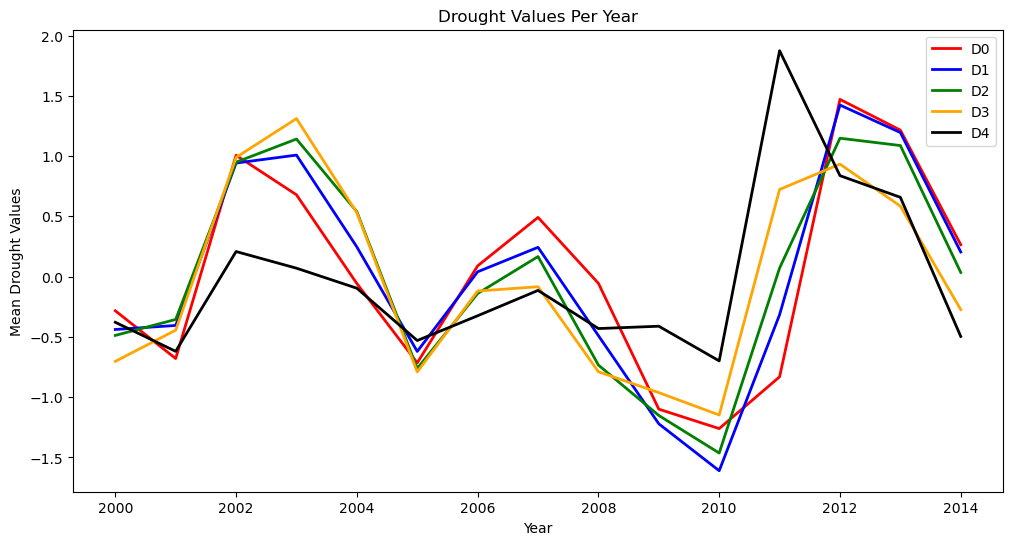

In [144]:
df2['Year'] = pd.to_datetime(df2['Year'], format='%Y')

mean_per_year = df2.groupby(df2['Year'].dt.year).mean()

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(mean_per_year.index, mean_per_year['D0'], color="red", linewidth=2, label='D0')
ax.plot(mean_per_year.index, mean_per_year['D1'], color="blue", linewidth=2, label='D1')
ax.plot(mean_per_year.index, mean_per_year['D2'], color="green", linewidth=2, label='D2')
ax.plot(mean_per_year.index, mean_per_year['D3'], color="orange", linewidth=2, label='D3')
ax.plot(mean_per_year.index, mean_per_year['D4'], color="black", linewidth=2, label='D4')

ax.set_xlabel('Year')
ax.set_ylabel('Mean Drought Values')
ax.set_title('Drought Values Per Year')
ax.legend()

plt.show()